In [1]:
import pandas as pd

- I downloaded a curated database of TCR / epitope pairings. The evidence supporting the large majority of the pairings is dextramer, tetramer, or multimer sorting and then sequencing. Often this is single-cell data
- I cross-referenced the database with the Tabula Sapiens database of TCRs that I created
- When I do this I end up with around 25 TCR Betas with exact matches in the database of TCR / epitope pairings, this is about 1/100 of the TCRBs in Tabula Sapiens currently
    
    - EBV           12 peptides
    - CMV            8 peptides
    - InfluenzaA     5 peptides
    
- EBV binding T cells are also inferred:
        - in TSP2, TSP7
            - in TSP7 the one EBV specific T cell is in the tongue
            - in TSP2 the EBV specific T cells are distributed amongst multiple immune organs
            
- There doesn't appear to be enrichment for a specific cell ontology class in these T cells which bind these viruses, which is expected

In [183]:
tcr_db.drop_duplicates('CDR3')

,complex.id,Gene,CDR3,V,J,Species,MHC A,MHC B,MHC class,Epitope,Epitope gene,Epitope species,Reference,Method,Meta,CDR3fix,Score
0,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2
1,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2
2,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2
3,3,TRB,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2
4,4,TRB,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73427,26171,TRA,CAVRHTNAGKSTF,TRAV21*01,TRAJ27*01,HomoSapiens,HLA-A*24:01,B2M,MHCI,QYIKWPWYI,Spike,SARS-CoV-2,PMID:34086357,"{""frequency"": ""1/11"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVRHTNAGKSTF"", ""cdr3_old"": ""CAVRHTN...",1
73428,26172,TRA,CAFLNAGGTSYGKLTF,TRAV38-1*01,TRAJ52*01,HomoSapiens,HLA-A*24:01,B2M,MHCI,QYIKWPWYI,Spike,SARS-CoV-2,PMID:34086357,"{""frequency"": ""1/11"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAFLNAGGTSYGKLTF"", ""cdr3_old"": ""CAFL...",1
73430,26174,TRA,CAVRALYNFNKFYF,TRAV3*01,TRAJ21*01,HomoSapiens,HLA-A*24:01,B2M,MHCI,QYIKWPWYI,Spike,SARS-CoV-2,PMID:34086357,"{""frequency"": ""1/11"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVRALYNFNKFYF"", ""cdr3_old"": ""CAVRAL...",1
73431,26175,TRA,CAVESYNTDKLIF,TRAV41*01,TRAJ34*01,HomoSapiens,HLA-A*24:01,B2M,MHCI,QYIKWPWYI,Spike,SARS-CoV-2,PMID:34086357,"{""frequency"": ""1/11"", ""identification"": ""tetra...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVESYNTDKLIF"", ""cdr3_old"": ""CAVESYN...",1


In [160]:
# load VDJdb curated database of TCR / epitope pairings
#https://vdjdb.cdr3.net/search
tcr_db = pd.read_table('/home/michaelswift/Downloads/SearchTable-2021-11-08 01 39 17.43.tsv')
# load summary table from Tabula Sapiens
ts_tcrs = pd.read_table('../../data/SuppTab6_BCRslashTCRSummary.tsv')

# subset to TCR
ts_tcrs = ts_tcrs[ts_tcrs.receptor_type == 'TCR']

# exact cdr3 matches
cdr3_hits = pd.merge(tcr_db, ts_tcrs, left_on='CDR3', right_on="IR_VDJ_1_junction_aa")

print(cdr3_hits.shape[0], "exact CDR3 matches in VDJdb")

#create table of exact tcrB matches from TS into VDJdb
tcrb_hits = cdr3_hits[(cdr3_hits['V'] == cdr3_hits['IR_VDJ_1_v_call']) & (cdr3_hits['J'] == cdr3_hits['IR_VDJ_1_j_call'])]
# drop duplicates

tcrb_hits = tcrb_hits.drop_duplicates(subset = 'cell_identifier', keep='last')

577 exact CDR3 matches in VDJdb


## How many exact matching TCRB sequences are both Tabula Sapiens and the VDJdb?

In [161]:
print("exact TCRB matches from TS found in VDJdb:  ", tcrb_hits.shape[0] )
print("TS cdr3 database size:  ", ts_tcrs.IR_VDJ_1_junction_aa.dropna().shape[0])
print("VDJdb database size:  ", tcr_db.shape[0])

exact TCRB matches from TS found in VDJdb:   25
TS cdr3 database size:   2904
VDJdb database size:   73433


## What organism are these inferred binding interactions from? 

In [162]:
tcrb_hits['Epitope species'].value_counts()

EBV           12
CMV            8
InfluenzaA     5
Name: Epitope species, dtype: int64

In [163]:
tcrb_hits['Epitope'].value_counts()

KLGGALQAK         5
FLRGRAYGL         4
GLCTLVAML         4
GILGFVFTL         3
NLVPMVATV         3
RAKFKQLL          3
GLIYNRMGAVTTEV    2
AVFDRKSDAK        1
Name: Epitope, dtype: int64

GILGFVFTL is a well studied epitope known to be immunodominant for the flu Matrix protein: 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4178881/

RAKFKQLL is a well studied epitope known to show positive T cells in EBV seropositive individuals

# What genes are being targeted by these TCRBs?

In [164]:
tcrb_hits.groupby('Epitope species')['Epitope gene'].value_counts()

Epitope species  Epitope gene
CMV              IE1             5
                 pp65            3
EBV              BMLF1           4
                 EBNA3A          4
                 BZLF1           3
                 EBNA4           1
InfluenzaA       M               3
                 M1              2
Name: Epitope gene, dtype: int64

Here is a wholistic looks at the species which bind and their epitopes

In [165]:
tcrb_hits[tcrb_hits['Epitope species'] == 'EBV'].groupby('donor').tissue.value_counts()

donor  tissue     
TSP2   Bone_Marrow    3
       Blood          2
       Muscle         2
       Kidney         1
       Lymph_Node     1
       Spleen         1
TSP7   Tongue         2
Name: tissue, dtype: int64

In [166]:
ts_tcrs[ts_tcrs.donor == 'TSP8'].tissue.value_counts()

Prostate    69
Name: tissue, dtype: int64

# Check out the autoimmune epitopes

In [167]:
tcrb_hits[tcrb_hits['Epitope species'] == 'HomoSapiens'][['tissue', 'cell_ontology_class', 'Epitope gene', 'donor']]

,tissue,cell_ontology_class,Epitope gene,donor


MLANA is quite interesting, it is a protein that is expressed on the surface of melanocytes https://en.wikipedia.org/wiki/MLANA

None of the T cells which presumably bind the MLANA protein were found in the skin, however this publication actually suggests they would be found anywhere. They exist in the repertoire at a level of aount 10^-3 and are generated during thymic selection.



# What are the clone sizes of these T cells which bind mostly viral epitopes?

<AxesSubplot:>

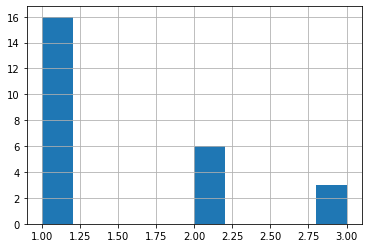

In [168]:
tcrb_hits.clone_id_size.hist()

## What is the makeup of the VDJdb TCRB to epitope pairings? 

In [169]:
tcr_db['Epitope species'].value_counts()

CMV                          34614
InfluenzaA                   11519
EBV                          10855
HomoSapiens                   4305
SARS-CoV-2                    2834
HIV-1                         2756
SIV                           1982
MCMV                          1435
HCV                            827
YFV                            697
HTLV-1                         229
DENV1                          177
DENV3/4                        174
PlasmodiumBerghei              170
HSV-2                          152
LCMV                           137
RSV                            125
synthetic                       92
DENV2                           60
M.tuberculosis                  56
VSV                             54
TriticumAestivum                51
MusMusculus                     50
HPV                             28
GallusGallus                    16
MCPyV                           10
StreptomycesKanamyceticus        6
E.Coli                           4
ManducaSexta        

## What are the annotated cell types of these

In [170]:
tcrb_hits.cell_ontology_class.value_counts()

cd8-positive, alpha-beta t cell                         9
cd8-positive, alpha-beta memory t cell                  4
cd4-positive, alpha-beta t cell                         3
immune cell                                             3
cd4-positive helper t cell                              2
t cell                                                  2
cd4-positive, alpha-beta memory t cell                  1
naive thymus-derived cd4-positive, alpha-beta t cell    1
Name: cell_ontology_class, dtype: int64

In [171]:
# All tcrs in TS to calibrate expected values
ts_tcrs.cell_ontology_class.value_counts()

cd8-positive, alpha-beta t cell                                716
cd4-positive, alpha-beta t cell                                642
t cell                                                         419
cd4-positive, alpha-beta memory t cell                         316
naive thymus-derived cd4-positive, alpha-beta t cell           305
cd8-positive, alpha-beta memory t cell                         287
innate lymphoid cell                                           209
cd4-positive helper t cell                                     202
immune cell                                                    166
cd4-positive alpha-beta t cell                                 101
regulatory t cell                                               54
cd8-positive alpha-beta t cell                                  47
nk cell                                                         40
leucocyte                                                       34
naive thymus-derived cd8-positive, alpha-beta t cell          

It's possible there is a signal here, where the hits in VDJdb are more likely to be CD8-positive, alpha-beta t cells than random. It seems like an odd claim to make given the annotations are so weird. I think a statistical test could be done here to ask whether the viral binders are enriched for CD8-positive t cells (or any other type) but that test seems meaningless to me

# are certain donors / tissues more or less likely to show up in this database? 

In [172]:
ts_tcrs.tissue.value_counts()

Lymph_Node        882
Bone_Marrow       503
Blood             438
Spleen            415
Muscle            286
Salivary_Gland    242
Skin              190
Tongue            176
Fat               164
Mammary            91
Kidney             71
Prostate           69
Eye                61
Uterus             39
Vasculature        13
Bladder             8
Pancreas            5
Liver               4
Thymus              4
Lung                3
Trachea             1
Name: tissue, dtype: int64

In [173]:
ts_tcrs.donor.value_counts()

TSP2     1590
TSP7     1169
TSP4      263
TSP10     229
TSP11     204
TSP13      70
TSP8       69
TSP3       32
TSP5       29
TSP9        5
TSP6        5
Name: donor, dtype: int64

In [174]:
tcrb_hits.tissue.value_counts()

Muscle            5
Spleen            4
Tongue            3
Bone_Marrow       3
Blood             2
Lymph_Node        2
Skin              2
Prostate          1
Kidney            1
Eye               1
Salivary_Gland    1
Name: tissue, dtype: int64

In [175]:
tcrb_hits.donor.value_counts()

TSP2    17
TSP7     6
TSP8     1
TSP5     1
Name: donor, dtype: int64

In [176]:
tcrb_hits[tcrb_hits.tissue == 'Prostate'].cell_ontology_class.value_counts()

cd8-positive, alpha-beta t cell    1
Name: cell_ontology_class, dtype: int64

In [177]:
tcrb_hits[tcrb_hits['Epitope species'] == 'InfluenzaA'].groupby(['donor']).tissue.value_counts()

donor  tissue        
TSP2   Lymph_Node        1
       Skin              1
TSP7   Salivary_Gland    1
       Spleen            1
TSP8   Prostate          1
Name: tissue, dtype: int64

# what level of evidence suports most of these hits


In [178]:
for i, s in tcrb_hits.iterrows():
    print(s.Method)

{"frequency": "21/21", "identification": "CTL clone", "sequencing": "sanger", "singlecell": "", "verification": "pentamer-sort"}
{"frequency": "21/21", "identification": "CTL clone", "sequencing": "sanger", "singlecell": "", "verification": "pentamer-sort"}
{"frequency": "21/21", "identification": "CTL clone", "sequencing": "sanger", "singlecell": "", "verification": "pentamer-sort"}
{"frequency": "21/21", "identification": "CTL clone", "sequencing": "sanger", "singlecell": "", "verification": "pentamer-sort"}
{"frequency": "16/125", "identification": "cultured-T-cells", "sequencing": "sanger", "singlecell": "", "verification": ""}
{"frequency": "99.92%", "identification": "tetramer-sort", "sequencing": "amplicon-seq", "singlecell": "", "verification": ""}
{"frequency": "0.0016%", "identification": "antigen-loaded-targets,dextramer-sort", "sequencing": "amplicon-seq", "singlecell": "", "verification": ""}
{"frequency": "0.0016%", "identification": "antigen-loaded-targets,dextramer-sort

In [179]:
tcrb_hits.clone_id_size

70     2
71     2
72     2
73     2
419    1
456    1
470    3
471    3
472    3
477    1
479    1
514    1
515    1
516    1
522    1
528    2
529    2
530    1
532    1
536    1
537    1
538    1
556    1
570    1
571    1
Name: clone_id_size, dtype: int64

In [181]:
tcrb_hits.to_csv('VDJdb_TabulaSapiens_hits.tsv', sep='\t')